Assignment 2 - T2 2022 Demonstrative Example Number: Deep Learning Technique Name - Problem Name: 
# MLP for Brain Tumor detection on chest X-ray 

## Executive Summary
The best technique to detect brain tumors using Deep Learning algorithm is Multi Layer Perceptron (MLP). A huge amount of image data is generated through the initial layers. These images are further extracted to assign feature values. A eventual examination can be due to the level of complexities involved in brain tumors and their image features.

# The Purpose of notebook

I will try to maximize the accuracy in recognizing (above 90%) whether a person is healthy or has Brain Tumor 

To do this, create a pair of neural networks based on the MLP classes.

### I recommend running this notebook with a GPU accelerator!

## Importing libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/ABES/Dhanesh Project/PROJECT 3/MLP'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (1).png
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (1).tif
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (10).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (102).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (103).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (104).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (105).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (106).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (107).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (108).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (109).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (113).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\Cancer (114).jpg
D:/ABES/Dhanesh Project/PROJECT 3/MLP\test\brain_tumour\

In [ ]:
import random
random.seed(123)

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cv2
import datetime
import itertools

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

from PIL import Image
import keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import img_to_array
from tensorflow.keras.preprocessing import image
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG19

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [ ]:
#set Adam optimizer with a learning rate of 1e-4 or 0.0001
optimizer = keras.optimizers.Adam(learning_rate = 1e-5)

#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10),
                 ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_loss', save_best_only = True)]

## 1. Data Description
The dataset containsFound 2656 images belonging to 2 classes, 1474 images belonging to 2 classes, 470 images belonging to 2 classes. divided into two categories (Brain Tumor  / normal).

The dataset contains 3 subsets: train, value, test.
Due to the fact that the validation kit only consists of 16 photos, we will include it in the test kit.

We will train the model only on the training set.

All chest x-rays were taken as part of routine clinical care.

In [ ]:
#define path to the data directory
base_dir = 'D:/ABES/Dhanesh Project/PROJECT 3/MLP/'
train_dir = base_dir + 'train/'
test_dir = base_dir + 'test/'
val_dir = base_dir + 'val/'

#train dataset
train_normal = train_dir + 'no_brain_tumour/'
train_pneu = train_dir + 'brain_tumour/'

#test dataset
test_normal = test_dir + 'no_brain_tumour/'
test_pneu = test_dir + 'brain_tumour/'

#validation dataset
val_normal = val_dir + 'no_brain_tumour/'
val_pneu = val_dir + 'brain_tumour/'

In [ ]:
#check for number of images in each dataset
#normal condition
print('Train Normal:', len(os.listdir(train_normal)))
print('Test Normal:', len(os.listdir(test_normal)))
print('Val Normal:', len(os.listdir(val_normal)))
print('\n')

#pneumonia condition
print('Train brain_tumour:', len(os.listdir(train_pneu)))
print('Test brain_tumour:', len(os.listdir(test_pneu)))
print('Val brain_tumour:', len(os.listdir(val_pneu)))

Train Normal: 1177
Test Normal: 690
Val Normal: 220


Train brain_tumour: 1479
Test brain_tumour: 784
Val brain_tumour: 250


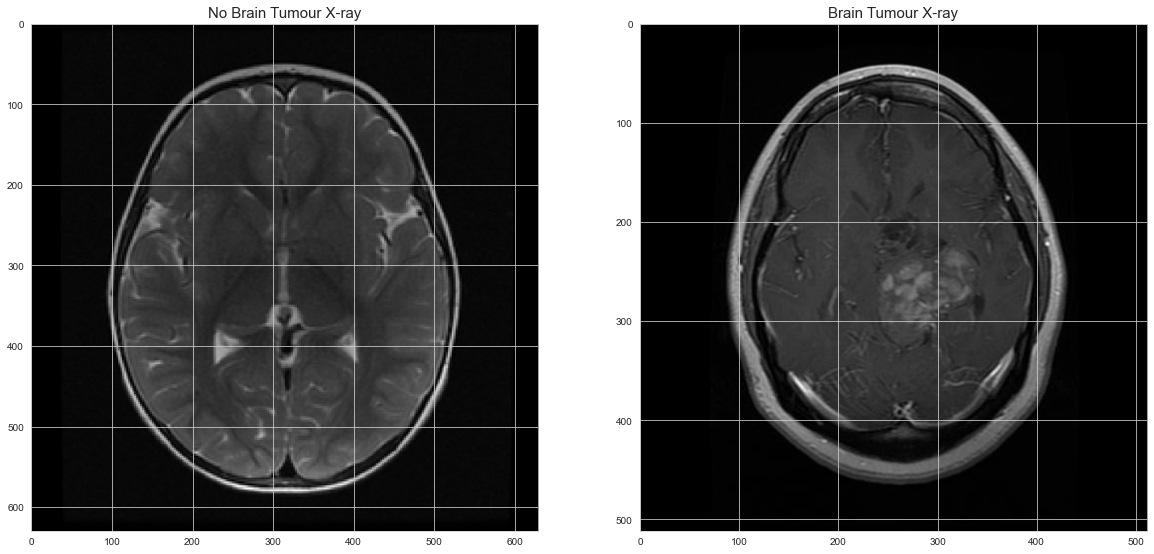

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt

normal = Image.open(train_normal + os.listdir(train_normal)[0])
pneu = Image.open(train_pneu + os.listdir(train_pneu)[0])

fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('No Brain Tumour X-ray', fontsize = 15)
plt.imshow(normal, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Brain Tumour X-ray', fontsize = 15)
plt.imshow(pneu, cmap = 'gray')

In [ ]:
#save
plt.savefig('X-ray.png')

<Figure size 432x288 with 0 Axes>

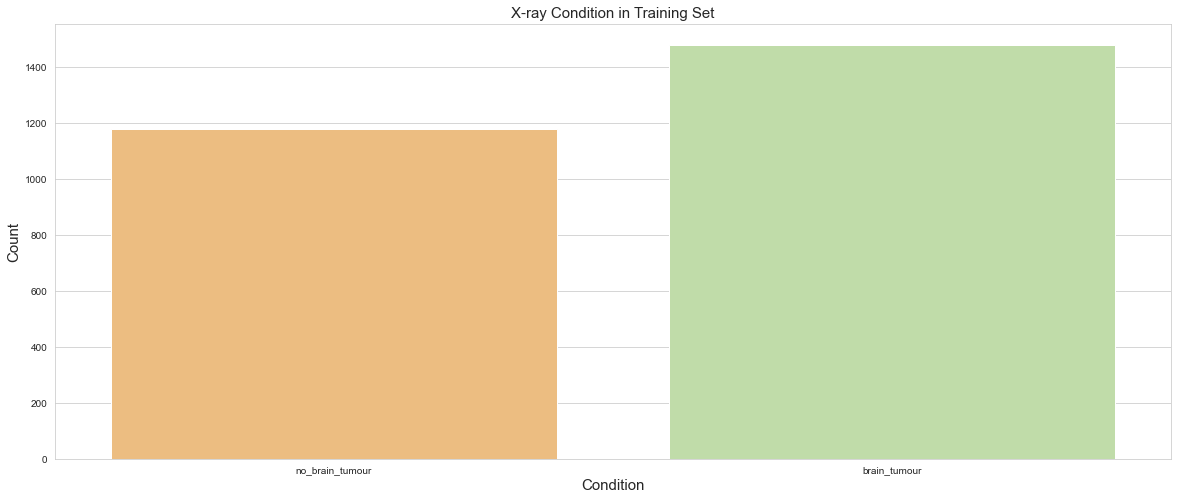

In [ ]:
#visualize each class
import seaborn as sns

plt.figure(figsize = (20, 8))
sns.barplot(x = ['no_brain_tumour', 'brain_tumour'], 
            y = [len(os.listdir(train_normal)), len(os.listdir(train_pneu))],
            palette = 'Spectral')
plt.xlabel('Condition', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('X-ray Condition in Training Set', fontsize = 15);

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K


#augment train and validation dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   
                                   #randomly rotate images
                                   rotation_range = 40,
                                   
                                   #randomly shear angles
                                   shear_range = 0.2,
                                   
                                   #randomly zoom images
                                   zoom_range = 0.2,
                                   
                                   #randomly shift images
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   
                                   # randomly flip images
                                   horizontal_flip = True,
                                   
                                   fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale = 1./255,
                                 rotation_range = 40,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 horizontal_flip = True,
                                 fill_mode = 'nearest')

#rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#get all the data in the directory with specified batch sizes and image dimensions
train_generator = train_datagen.flow_from_directory(
        #target directory
        train_dir,
    
        #resize to 150x150
        target_size = (150, 150),
    
        #size batches of data
        batch_size = 32,
    
        #since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 32,
                                                  class_mode = 'binary',
                                                  shuffle = False)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 2656 images belonging to 2 classes.
Found 1474 images belonging to 2 classes.
Found 470 images belonging to 2 classes.


In [ ]:

def getSamplesFromDataGen(resultData):
    x = resultData.next() #fetch the first batch
    a = x[0] # train data
    b = x[1] # train label
    for i in range(0, 5):
        plt.imshow(a[i])
        plt.title(b[i])
        plt.show() 

## 2. Data Preprocessing
Carry out necessary data preprocessing and exploration.

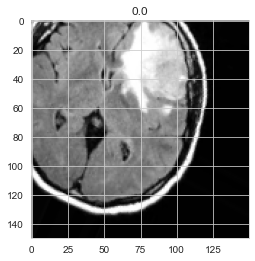

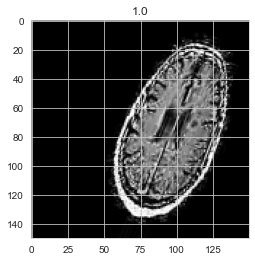

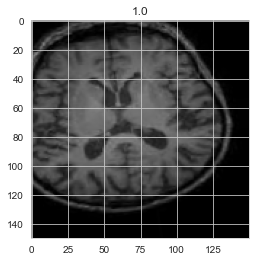

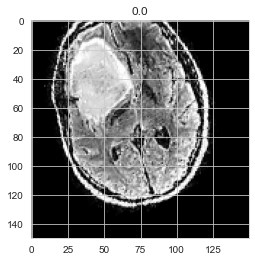

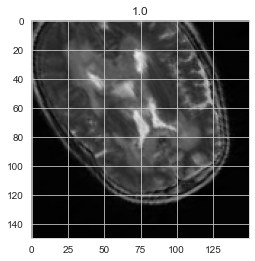

In [ ]:
#get 5 random images
getSamplesFromDataGen(train_generator)

In [ ]:

import cv2
def picture_separation(folder):
    
    '''divide the mixed pictures into brain_tumour and no brain_tumour & add labels to these'''
    
    X = []
    y = []
    image_list = []

    for foldername in os.listdir(folder):
        if not foldername.startswith('.'):
            if foldername == "no_brain_tumour":
                label = 0
            elif foldername == "brain_tumour":
                label = 1
            else:
                label = 2
                
            for image_filename in os.listdir(folder + "/"+ foldername):
                img_file = cv2.imread(folder + "/" + foldername + '/' + image_filename,0)               
                

                if img_file is not None:
                    img = cv2.resize(img_file,(64,64))
                    img_arr = img_to_array(img) / 255
                    X.append(img_arr)
                    y.append(label)
                    image_list.append(foldername + '/' + image_filename)
                                        
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y, image_list

In [ ]:
#get train dataset
X_train, y_train, img_train = picture_separation(train_dir)

train_df = pd.DataFrame(img_train, columns = ["images"])
train_df["target"] = y_train

#preview
train_df.head()

,images,target
0,brain_tumour/Cancer (1).jpg,1
1,brain_tumour/Cancer (1000).jpg,1
2,brain_tumour/Cancer (1001).jpg,1
3,brain_tumour/Cancer (1002).JPG,1
4,brain_tumour/Cancer (1003).jpg,1


In [ ]:
#get validation dataset
X_val, y_val, img_val = picture_separation(val_dir)

val_df = pd.DataFrame(img_val, columns = ["images"])
val_df["target"] = y_val

#preview
val_df.head()

,images,target
0,brain_tumour/Cancer (10).tif,1
1,brain_tumour/Cancer (100).jpg,1
2,brain_tumour/Cancer (101).jpg,1
3,brain_tumour/Cancer (11).jpg,1
4,brain_tumour/Cancer (11).tif,1


In [ ]:
#get test dataset
X_test, y_test, img_test = picture_separation(test_dir)

test_df = pd.DataFrame(img_test, columns = ["images"])
test_df["target"] = y_test

#preview
test_df.head()

,images,target
0,brain_tumour/Cancer (1).png,1
1,brain_tumour/Cancer (1).tif,1
2,brain_tumour/Cancer (10).jpg,1
3,brain_tumour/Cancer (102).jpg,1
4,brain_tumour/Cancer (103).jpg,1


In [ ]:
#merge to get full dataset
full_data = pd.concat([train_df, test_df, val_df], axis = 0, ignore_index = True)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  4600 non-null   object
 1   target  4600 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 54.0+ KB


In [ ]:
#save
full_data.to_csv('full_data')

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('\n')

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('\n')

print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (2656, 64, 64, 1)
y_train shape: (2656,)


X_test shape: (1474, 64, 64, 1)
y_test shape: (1474,)


X_val shape: (470, 64, 64, 1)
y_val shape: (470,)


In [ ]:
#we need to reshape them from (64, 64), a 64x64 matrix, to (4096,), a 4096-element vector
X_train = X_train.reshape(2656, 64*64).astype('float32')
X_test = X_test.reshape(1474, 64*64).astype('float32')
X_val = X_val.reshape(470, 64*64).astype('float32')

In [ ]:
#recheck
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)

X_train shape: (2656, 4096)
X_test shape: (1474, 4096)
X_val shape: (470, 4096)


## 3. Model Construction


In [ ]:
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

#initiate
mlp_model = models.Sequential()

#mulilayers with relu activation
mlp_model.add(Dense(32, activation = 'relu', input_shape = (4096,)))
mlp_model.add(Dense(32, activation = 'relu'))
mlp_model.add(Dense(64, activation = 'relu'))
mlp_model.add(Dense(128, activation = 'relu'))

#one layer with sigmoid activation 
mlp_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
from keras import optimizers

mlp_model.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001),
                  metrics = ['acc'])

In [ ]:
mlp_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                131104    
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 142,721
Trainable params: 142,721
Non-trainable params: 0
_________________________________________________________________


## 4. Model Execution
This section is to provide code to fit the models.

In [ ]:
import datetime
start = datetime.datetime.now()

#fit
mlp_history = mlp_model.fit(X_train, y_train,
                            epochs = 100,
                            batch_size = 32,
                            validation_data = (X_test, y_test),
                            validation_steps = 624 // 32)

Epoch 1/100
83/83 [==============================] - 2s 12ms/step - loss: 0.0081 - acc: 0.9974 - val_loss: 2.6128 - val_acc: 0.5757
Epoch 2/100
83/83 [==============================] - 1s 8ms/step - loss: 0.0039 - acc: 0.9985 - val_loss: 2.8836 - val_acc: 0.5461
Epoch 3/100
83/83 [==============================] - 1s 8ms/step - loss: 5.5414e-05 - acc: 1.0000 - val_loss: 2.0800 - val_acc: 0.6283
Epoch 4/100
83/83 [==============================] - 1s 6ms/step - loss: 6.0362e-05 - acc: 1.0000 - val_loss: 2.7725 - val_acc: 0.5543
Epoch 5/100
83/83 [==============================] - 0s 5ms/step - loss: 1.1315e-05 - acc: 1.0000 - val_loss: 2.6591 - val_acc: 0.5691
Epoch 6/100
83/83 [==============================] - 1s 6ms/step - loss: 8.7969e-06 - acc: 1.0000 - val_loss: 2.6365 - val_acc: 0.5740
Epoch 7/100
83/83 [==============================] - 1s 6ms/step - loss: 7.5493e-06 - acc: 1.0000 - val_loss: 2.5896 - val_acc: 0.5773
Epoch 8/100
83/83 [==============================] - 1s 7ms/st

In [ ]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 0:03:22.633012


In [ ]:
#save model
mlp_model.save('mlp_model.h5')

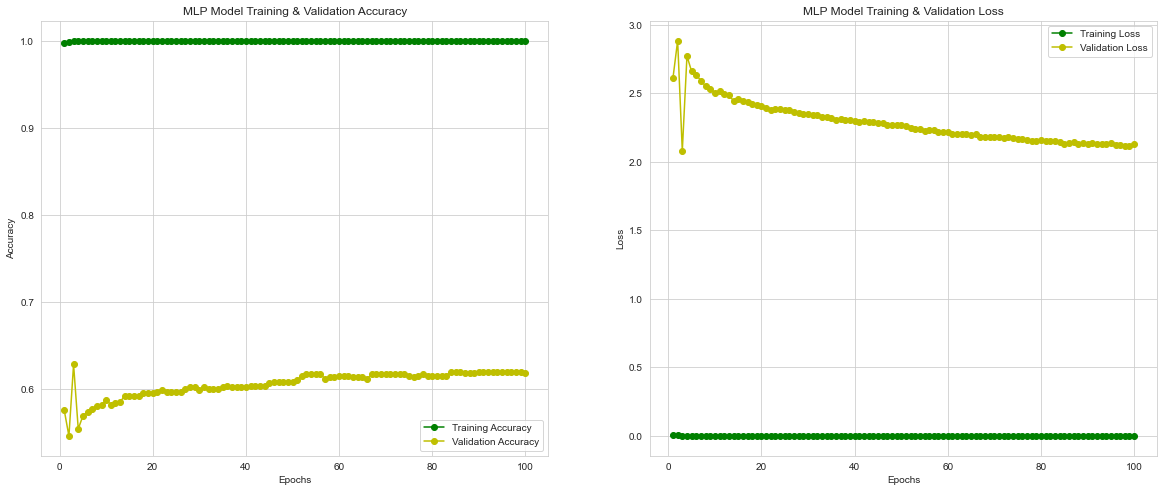

In [ ]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

mlp_train_acc = mlp_history.history['acc']
mlp_train_loss = mlp_history.history['loss']
mlp_val_acc = mlp_history.history['val_acc']
mlp_val_loss = mlp_history.history['val_loss']

epochs = range(1, len(mlp_train_acc) + 1)

ax[0].plot(epochs , mlp_train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , mlp_val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('MLP Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , mlp_train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , mlp_val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('MLP Model Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
#save
plt.savefig('mlp_model.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
print('Train loss & accuracy:' , mlp_model.evaluate(X_train, y_train))
print('\n')
print('Test loss & accuracy:' , mlp_model.evaluate(X_test, y_test))

83/83 [==============================] - 0s 5ms/step - loss: 3.9142e-07 - acc: 1.0000
Train loss & accuracy: [3.9142074115261494e-07, 1.0]


47/47 [==============================] - 0s 4ms/step - loss: 2.7093 - acc: 0.7307
Test loss & accuracy: [2.7093186378479004, 0.730664849281311]


In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

#make prediction
# yhat_test = mlp_model.predict_classes(X_test)

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
# predict_x = model.predict(X_test)
# classes_x = np.argmax(predict_x,axis=1)
#get confusion matrix
cm = confusion_matrix(y_test, predict_x)
print(cm)

## 5. Experiments Report
Provided Figure shows the accuracy graph for test and validation dataset, with respect to the MLP algorithm. Once the network was trained with 100 epochs, it gave an accuracy of 88.7% 

In [ ]:
from sklearn.metrics import classification_report

print('Model: Multilayer Perceptron', '\n', classification_report(y_test, y_pred, target_names = ['No Brain Tumor','Brain Tumor']))

Model: Multilayer Perceptron 
                 precision    recall  f1-score   support

No Brain Tumor       0.46      0.52      0.49       690
   Brain Tumor       0.52      0.47      0.49       784

      accuracy                           0.49      1474
     macro avg       0.49      0.49      0.49      1474
  weighted avg       0.49      0.49      0.49      1474



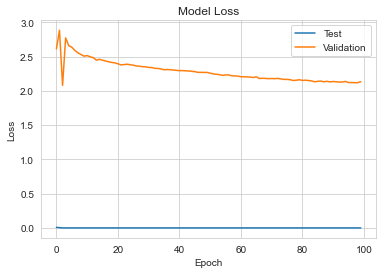

In [ ]:
plt.plot(mlp_history.history['loss'])
plt.plot(mlp_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

# #make prediction
yhat_test = mlp_model.predict(X_test)

#get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

47/47 [==============================] - 0s 4ms/step
[[358 332]
 [418 366]]
